In [ ]:
import pandas as pd

df = pd.read_csv('/content/bike_sales_100k.csv')

In [13]:
display(df)

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Sales,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,73,01-01-2020,3495,Road Bike,2635.170998,1,2635.170998,Philadelphia,485,Cash,53,Male
1,1242,01-01-2020,7431,Hybrid Bike,2729.788653,3,8189.365959,New York,113,Cash,68,Female
2,2116,01-01-2020,3059,Hybrid Bike,2639.297081,1,2639.297081,Philadelphia,335,Debit Card,65,Male
3,3369,01-01-2020,3569,BMX,2553.173707,3,7659.521121,Philadelphia,965,Debit Card,69,Female
4,5217,01-01-2020,5983,Mountain Bike,2467.145790,2,4934.291581,New York,421,Cash,51,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,90483,22-09-2024,4654,Electric Bike,2573.766250,2,5147.532500,Houston,578,Apple Pay,58,Female
99996,91071,22-09-2024,2274,Hybrid Bike,2594.743439,2,5189.486878,Phoenix,174,PayPal,42,Male
99997,97294,22-09-2024,2751,Hybrid Bike,2711.962166,1,2711.962166,Philadelphia,856,PayPal,38,Female
99998,99043,22-09-2024,4742,Mountain Bike,2657.827296,2,5315.654592,San Antonio,479,Apple Pay,46,Male


In [14]:
print(df['Date'].min())
print(df['Date'].max())

01-01-2020
31-12-2023


In [15]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Is_Weekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)

In [16]:
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Sale_ID          100000 non-null  int64         
 1   Date             100000 non-null  datetime64[ns]
 2   Customer_ID      100000 non-null  int64         
 3   Bike_Model       100000 non-null  object        
 4   Price            100000 non-null  float64       
 5   Quantity         100000 non-null  int64         
 6   Sales            100000 non-null  float64       
 7   Store_Location   100000 non-null  object        
 8   Salesperson_ID   100000 non-null  int64         
 9   Payment_Method   100000 non-null  object        
 10  Customer_Age     100000 non-null  int64         
 11  Customer_Gender  100000 non-null  object        
 12  Year             100000 non-null  int32         
 13  Month            100000 non-null  int32         
 14  Day              1000

# Visualizing Data

## Sales by Day

In [17]:
df_sales_per_day = df.groupby('Date')['Sales'].sum()

print('all time min sales:', df_sales_per_day.min())
print('all time max sales:', df_sales_per_day.max())

all time min sales: 136212.164191
all time max sales: 467031.67444


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

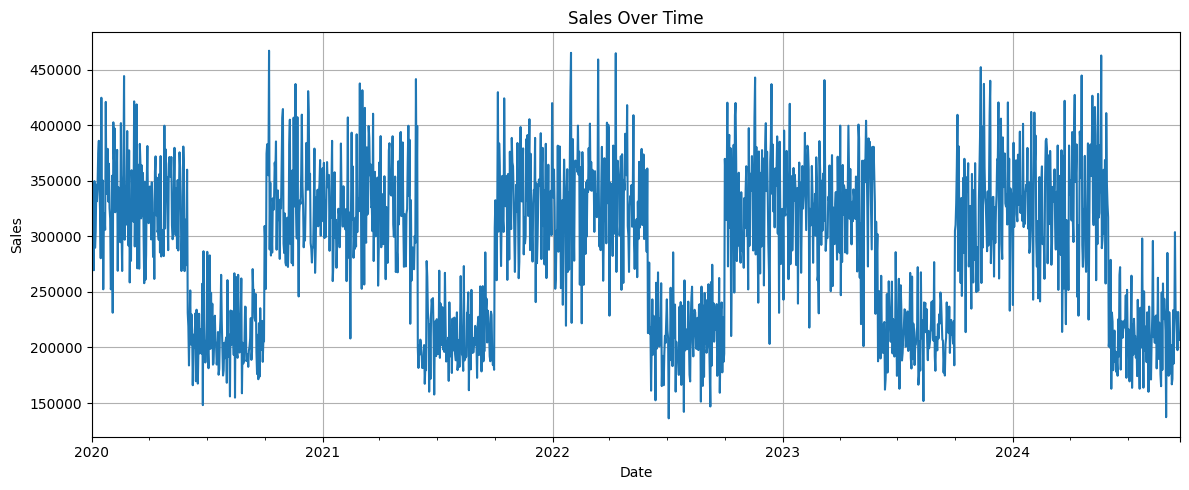

In [19]:
plt.figure(figsize=(12, 5))
df.groupby('Date')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
sales_by_weekend = df.groupby('Is_Weekend')['Sales'].sum().astype(int)
sales_by_weekend.index = sales_by_weekend.index.map({0: 'Weekday', 1: 'Weekend'})
print(sales_by_weekend)


Is_Weekend
Weekday    355909427
Weekend    142052758
Name: Sales, dtype: int64


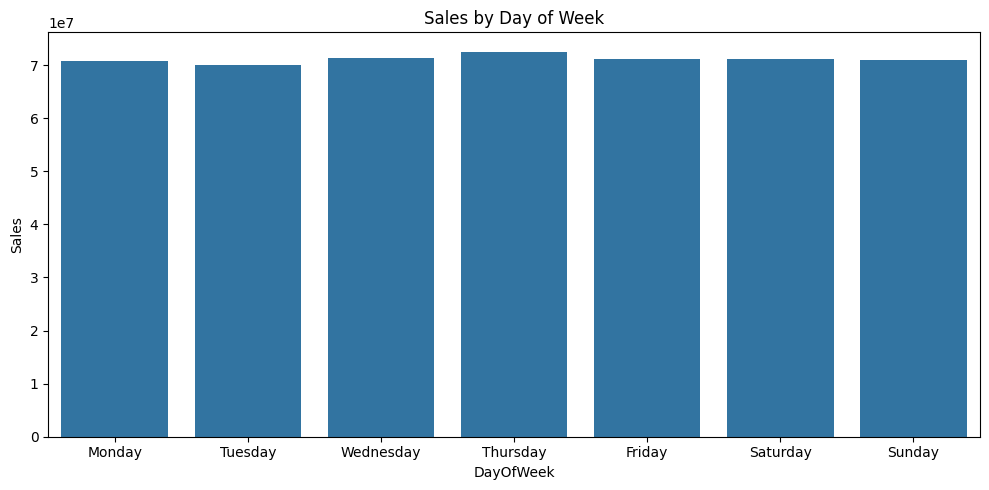

In [21]:
dow_sales = df.groupby('DayOfWeek')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 5))
sns.barplot(x=dow_sales.index, y=dow_sales.values)
plt.title('Sales by Day of Week')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3103253214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_weekend.index, y=sales_by_weekend.values.astype(int), palette='pastel', legend=False)


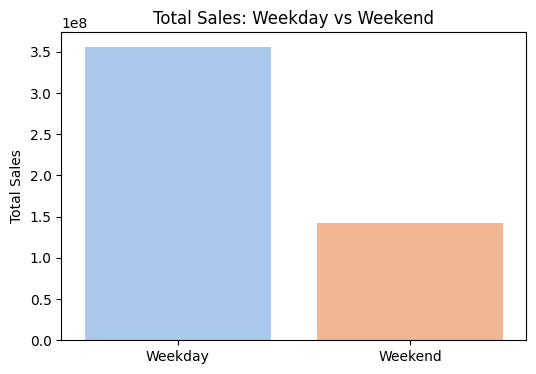

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_weekend.index, y=sales_by_weekend.values.astype(int), palette='pastel', legend=False)
plt.title('Total Sales: Weekday vs Weekend')
plt.ylabel('Total Sales')
plt.xlabel('')
plt.show()

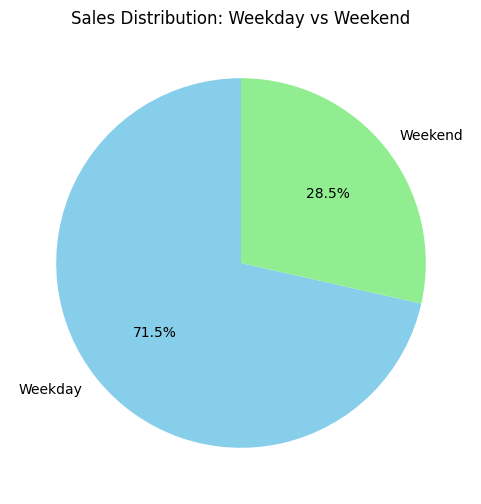

In [23]:
plt.figure(figsize=(6,6))
plt.pie(sales_by_weekend, labels=sales_by_weekend.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Sales Distribution: Weekday vs Weekend')
plt.show()

## Sales by Model

In [24]:
df_sales_per_model = df.groupby('Bike_Model')['Sales'].sum().sort_values(ascending=False).astype(int)

display(df_sales_per_model)

,Sales
Bike_Model,
BMX,72204427
Road Bike,71680491
Hybrid Bike,71589175
Folding Bike,71355169
Cruiser,70977544
Electric Bike,70590848
Mountain Bike,69564529


In [25]:
max_model = df_sales_per_model.idxmax()
max_sales = df_sales_per_model.max()

min_model = df_sales_per_model.idxmin()
min_sales = df_sales_per_model.min()

print(f"Max Sales: {max_model} with {max_sales}")
print(f"Min Sales: {min_model} with {min_sales}")

Max Sales: BMX with 72204427
Min Sales: Mountain Bike with 69564529


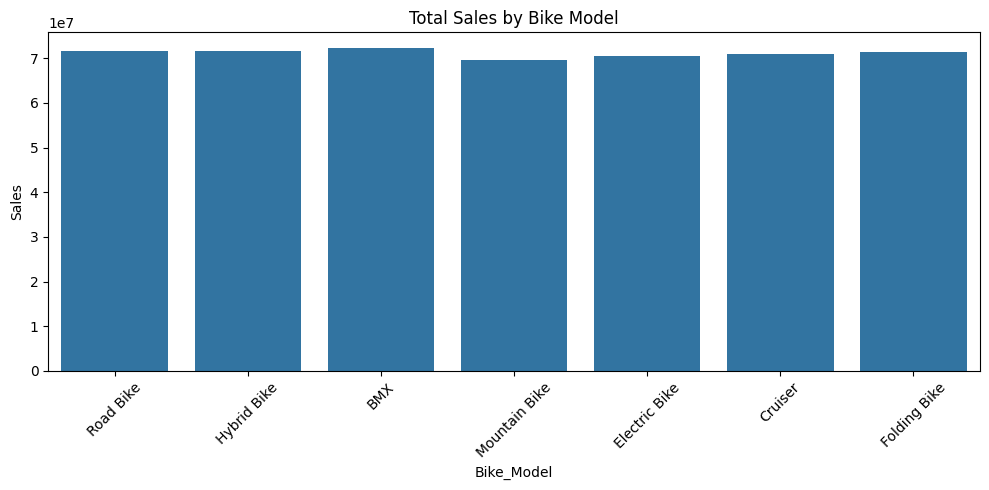

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Bike_Model', y='Sales', estimator='sum', errorbar=None)
plt.title('Total Sales by Bike Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### we can conclude that the highest selling bike model is **Hybrid Bike with 112505510** and lowest selling bike model is **Mountain Bike with 109636966**

## Payment Method

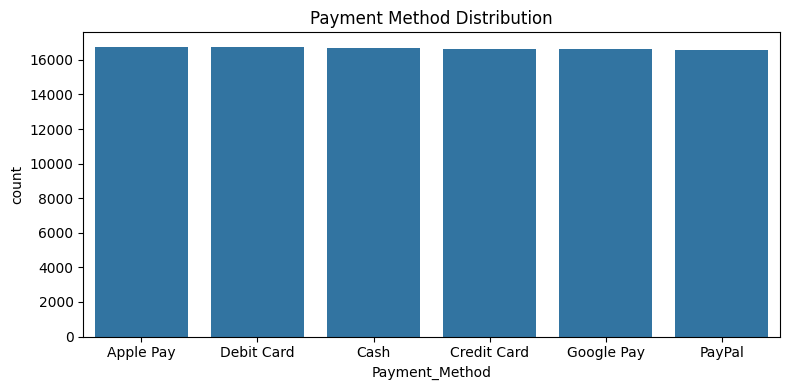

In [27]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Payment_Method', order=df['Payment_Method'].value_counts().index)
plt.title('Payment Method Distribution')
plt.tight_layout()
plt.show()

## Sales by Location

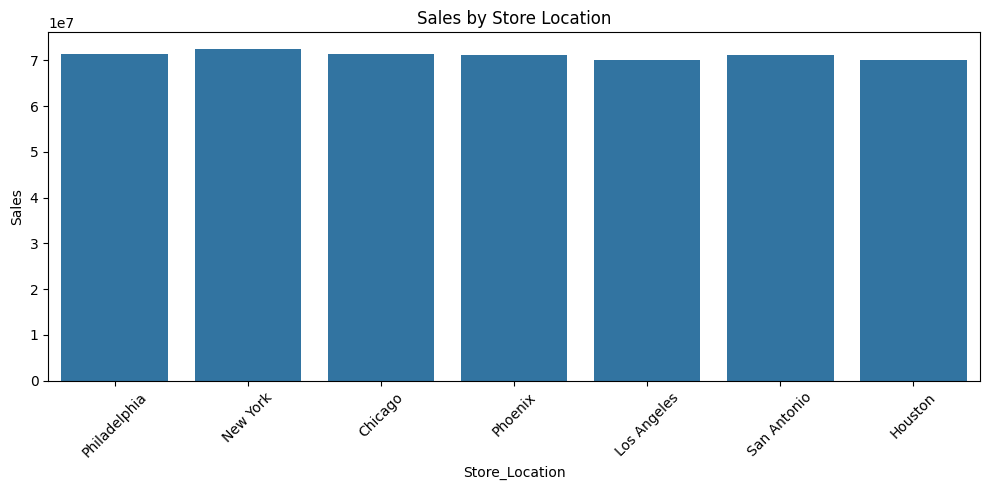

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Store_Location', y='Sales', estimator='sum', errorbar=None)
plt.title('Sales by Store Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Max Bike Quantity per Location

In [29]:
# Group by location and model, sum quantity
grouped_qty = df.groupby(['Store_Location', 'Bike_Model'])['Quantity'].sum()

idx_qty = grouped_qty.groupby(level=0).idxmax()
max_qty_per_location = grouped_qty.loc[idx_qty].reset_index()

print(max_qty_per_location)


  Store_Location     Bike_Model  Quantity
0        Chicago  Electric Bike      4060
1        Houston   Folding Bike      3959
2    Los Angeles            BMX      3996
3       New York    Hybrid Bike      4145
4   Philadelphia        Cruiser      3966
5        Phoenix      Road Bike      4098
6    San Antonio   Folding Bike      4048


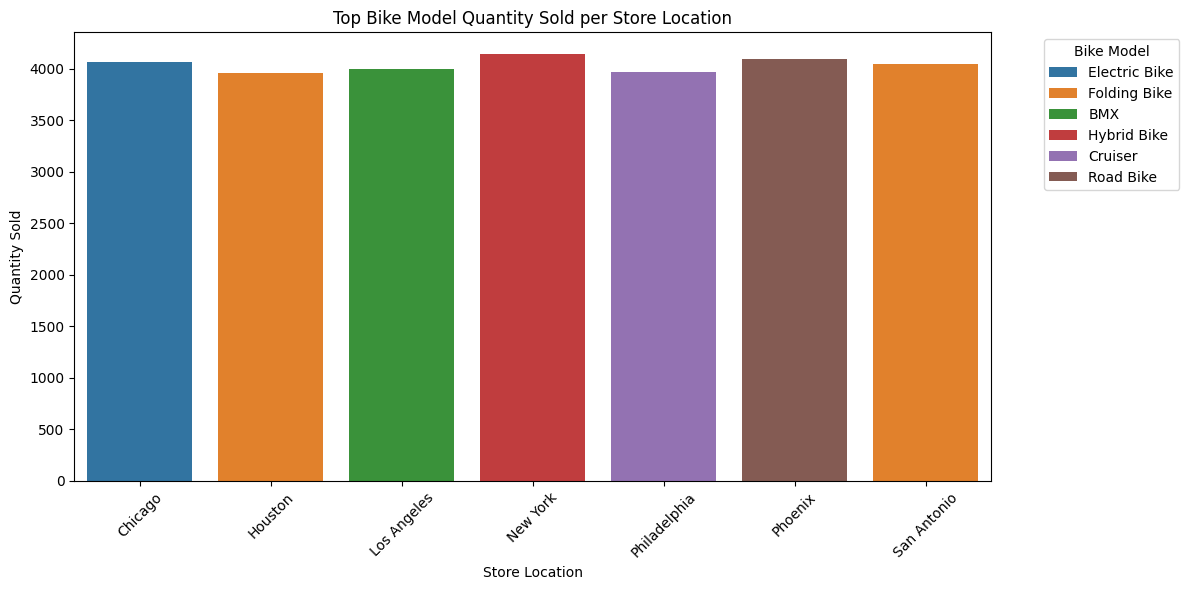

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=max_qty_per_location, x='Store_Location', y='Quantity', hue='Bike_Model', dodge=False, palette='tab10')

plt.title('Top Bike Model Quantity Sold per Store Location')
plt.ylabel('Quantity Sold')
plt.xlabel('Store Location')
plt.xticks(rotation=45)
plt.legend(title='Bike Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

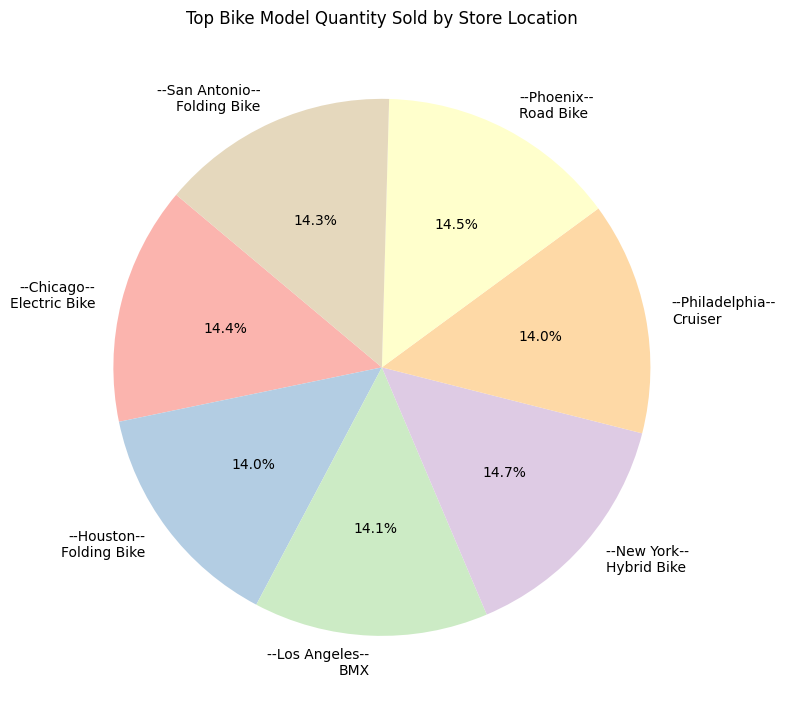

In [31]:
import matplotlib.pyplot as plt

labels = max_qty_per_location.apply(lambda row: f'--{row["Store_Location"]}--\n{row["Bike_Model"]}', axis=1)

plt.figure(figsize=(8, 8))
plt.pie(
    max_qty_per_location['Quantity'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title('Top Bike Model Quantity Sold by Store Location')
plt.tight_layout()
plt.show()


### The top-selling bike model varies by store location, with Hybrid Bikes leading in Chicago and New York, while models like Folding Bike, Road Bike, BMX, and Cruiser dominate in other cities. Quantities sold are fairly consistent across locations, ranging from about 6,200 to 6,400 units.

## Sales by Gender

### 1. Total Sales by Gender

In [32]:
total_sales_gender = df.groupby('Customer_Gender')['Sales'].sum()
print(total_sales_gender)

Customer_Gender
Female    2.498743e+08
Male      2.480879e+08
Name: Sales, dtype: float64


/tmp/ipython-input-3610409057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_gender.index, y=total_sales_gender.values, palette='pastel')


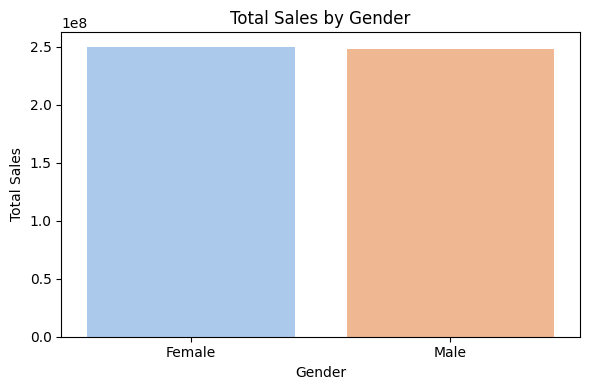

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=total_sales_gender.index, y=total_sales_gender.values, palette='pastel')
plt.title('Total Sales by Gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

### 2. Top Bike Models by Gender (by Sales)

In [34]:
top_model_by_gender = (
    df.groupby(['Customer_Gender', 'Bike_Model'])['Sales']
    .sum()
    .reset_index()
)

top_model_per_gender = top_model_by_gender.loc[
    top_model_by_gender.groupby('Customer_Gender')['Sales'].idxmax()
]

print(top_model_per_gender)


   Customer_Gender Bike_Model         Sales
0           Female        BMX  3.652100e+07
13            Male  Road Bike  3.581490e+07


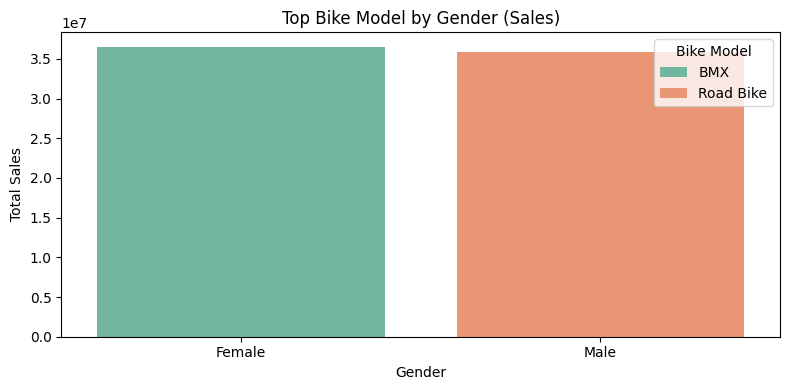

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(data=top_model_per_gender, x='Customer_Gender', y='Sales', hue='Bike_Model', dodge=False, palette='Set2')
plt.title('Top Bike Model by Gender (Sales)')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.legend(title='Bike Model')
plt.tight_layout()
plt.show()


### 3. Quantity Purchased by Gender

In [36]:
total_quantity_gender = df.groupby('Customer_Gender')['Quantity'].sum()
print(total_quantity_gender)


Customer_Gender
Female    96166
Male      95474
Name: Quantity, dtype: int64


/tmp/ipython-input-4156157050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_quantity_gender.index, y=total_quantity_gender.values, palette='pastel')


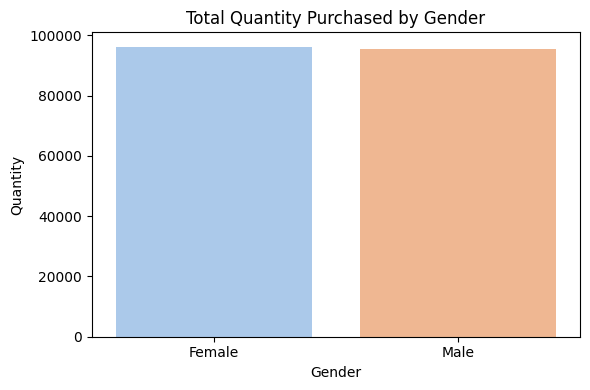

In [37]:
plt.figure(figsize=(6,4))
sns.barplot(x=total_quantity_gender.index, y=total_quantity_gender.values, palette='pastel')
plt.title('Total Quantity Purchased by Gender')
plt.ylabel('Quantity')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


### 4. Seasonal/Monthly Trends by Gender

In [38]:
monthly_sales_gender = (
    df.groupby(['Year', 'Month', 'Customer_Gender'])['Sales']
    .sum()
    .reset_index()
)

print(monthly_sales_gender.head())


   Year  Month Customer_Gender         Sales
0  2020      1          Female  5.156702e+06
1  2020      1            Male  5.074265e+06
2  2020      2          Female  4.958326e+06
3  2020      2            Male  4.826051e+06
4  2020      3          Female  4.887860e+06


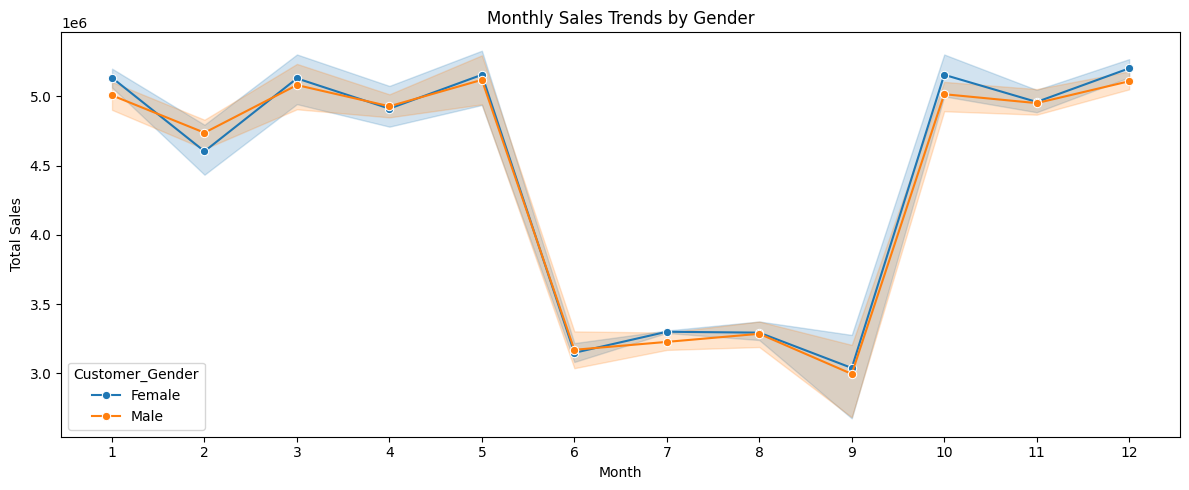

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_sales_gender, x='Month', y='Sales', hue='Customer_Gender', marker='o')
plt.title('Monthly Sales Trends by Gender')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


*   Sales Fluctuations: Both female and male customers show similar seasonal sales patterns with ups and downs throughout the year.
*   Overall Sales Levels: Female sales (blue line) are generally higher than male sales (orange line) for most months, indicating females tend to spend more or buy more bikes overall.
*   Seasonal Dip: There is a noticeable dip in sales around month 2 (February) and month 9 (September) for both genders — possibly off-season or slower months.
*   Peak Months: Sales peak around months 3 (March), 7 (July), and 10 (October), where female sales especially show strong spikes.

In [40]:
weekend_sales_gender = (
    df.groupby(['Customer_Gender', 'Is_Weekend'])['Sales']
    .sum()
    .reset_index()
)

# Map 0/1 to Weekday/Weekend for readability
weekend_sales_gender['Day_Type'] = weekend_sales_gender['Is_Weekend'].map({0: 'Weekday', 1: 'Weekend'})

print(weekend_sales_gender)


  Customer_Gender  Is_Weekend         Sales Day_Type
0          Female           0  1.784409e+08  Weekday
1          Female           1  7.143339e+07  Weekend
2            Male           0  1.774685e+08  Weekday
3            Male           1  7.061937e+07  Weekend


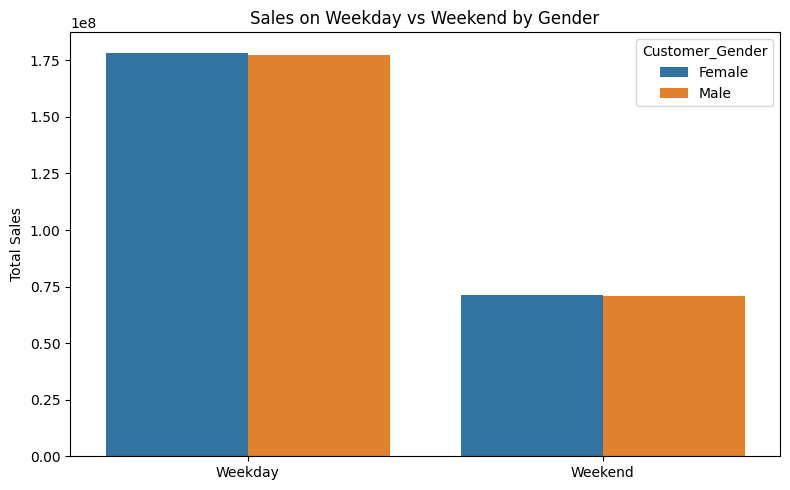

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=weekend_sales_gender, x='Day_Type', y='Sales', hue='Customer_Gender')
plt.title('Sales on Weekday vs Weekend by Gender')
plt.ylabel('Total Sales')
plt.xlabel('')
plt.tight_layout()
plt.show()


## Sales by Customer Age

### 1. Sales Distribution by Age Groups

Age_Group
<20        9409855
20-29     94079262
30-39     94087480
40-49     93310933
50-59     94289409
60+      112785244
Name: Sales, dtype: int64


/tmp/ipython-input-2525587435.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age = df.groupby('Age_Group')['Sales'].sum().astype(int)
/tmp/ipython-input-2525587435.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='pastel')


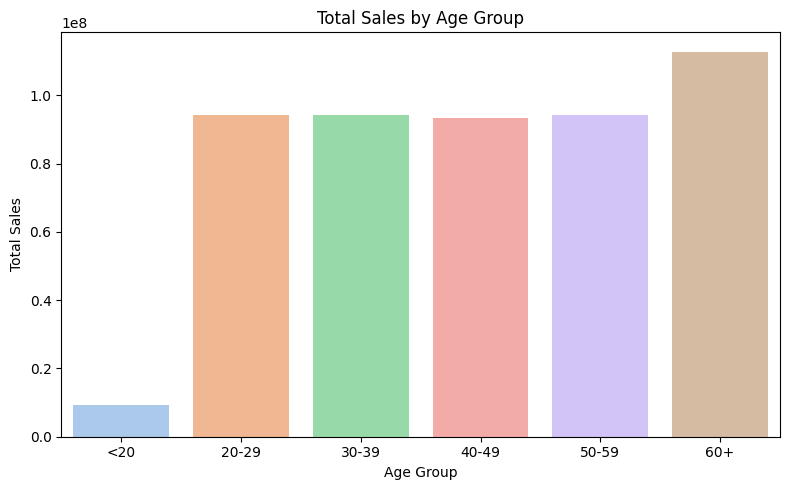

In [42]:
bins = [0, 19, 29, 39, 49, 59, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

sales_by_age = df.groupby('Age_Group')['Sales'].sum().astype(int)
print(sales_by_age)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_age.index, y=sales_by_age.values, palette='pastel')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### 2. Top Bike Models by Age Group

/tmp/ipython-input-2756539689.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Bike_Model'])['Sales']
/tmp/ipython-input-2756539689.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_model_by_age.groupby('Age_Group')['Sales'].idxmax()


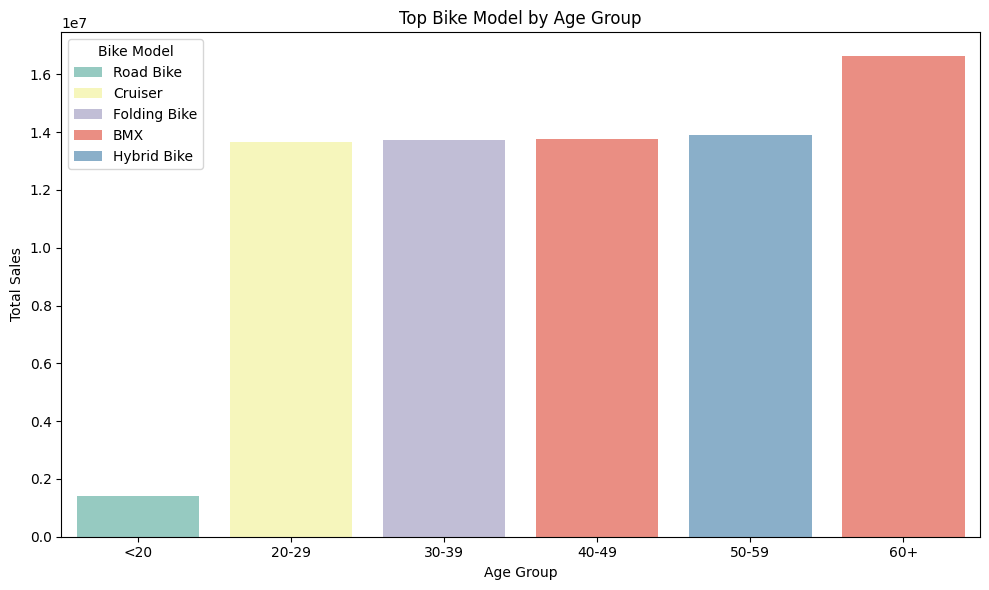

In [43]:
top_model_by_age = (
    df.groupby(['Age_Group', 'Bike_Model'])['Sales']
    .sum()
    .reset_index()
)

top_model_per_age = top_model_by_age.loc[
    top_model_by_age.groupby('Age_Group')['Sales'].idxmax()
]

plt.figure(figsize=(10,6))
sns.barplot(data=top_model_per_age, x='Age_Group', y='Sales', hue='Bike_Model', dodge=False, palette='Set3')
plt.title('Top Bike Model by Age Group')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.legend(title='Bike Model')
plt.tight_layout()
plt.show()


### 3. Age Group Sales Trends Over Months

/tmp/ipython-input-3316296947.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Year', 'Month', 'Age_Group'])['Sales']


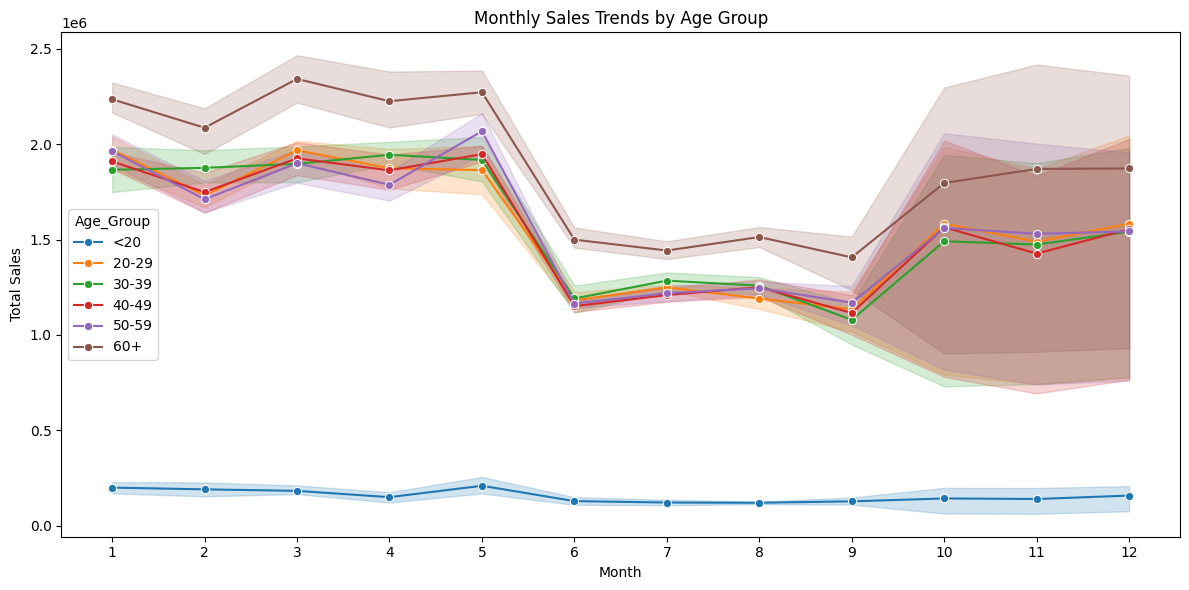

In [44]:
monthly_sales_age = (
    df.groupby(['Year', 'Month', 'Age_Group'])['Sales']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales_age, x='Month', y='Sales', hue='Age_Group', marker='o')
plt.title('Monthly Sales Trends by Age Group')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


### 4. Age Group and Gender Combined Analysis (Sales)

/tmp/ipython-input-3258540846.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age_Group', 'Customer_Gender'])['Sales']


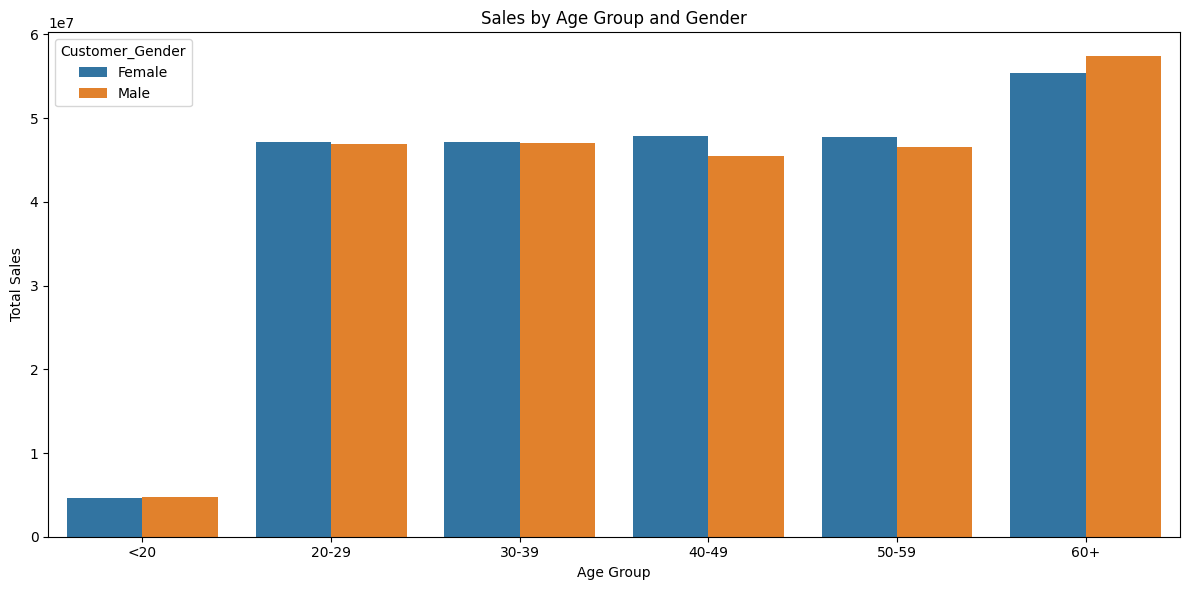

In [45]:
sales_age_gender = (
    df.groupby(['Age_Group', 'Customer_Gender'])['Sales']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=sales_age_gender, x='Age_Group', y='Sales', hue='Customer_Gender')
plt.title('Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


### 5. Customer Age and Purchase Frequency

/tmp/ipython-input-3816928610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_freq_age = df.groupby('Age_Group').size()


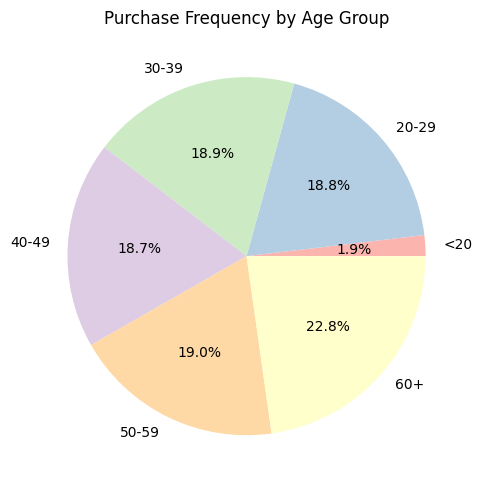

In [46]:
purchase_freq_age = df.groupby('Age_Group').size()

plt.figure(figsize=(8,5))
plt.pie(purchase_freq_age, labels=purchase_freq_age.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('Purchase Frequency by Age Group')
plt.tight_layout()
plt.show()


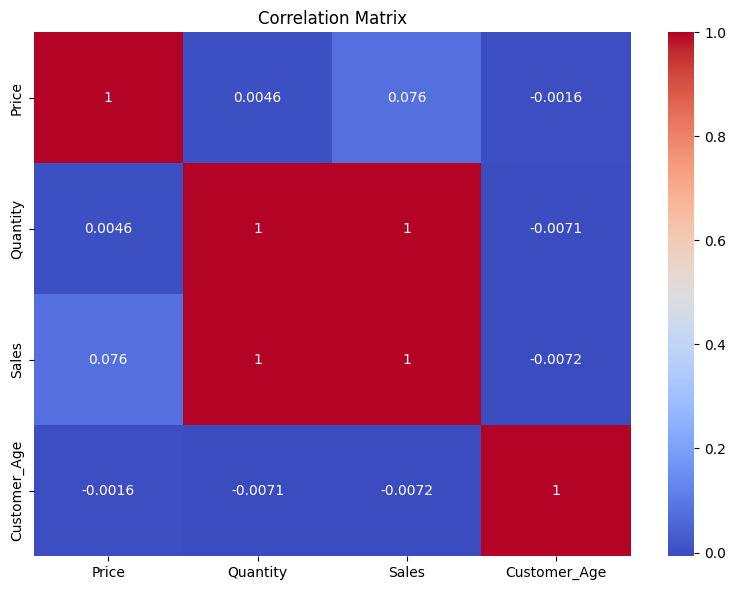

In [47]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Price', 'Quantity', 'Sales', 'Customer_Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [48]:
display(df)
# df_dummies = pd.get_dummies(df['Customer_Gender'])

# df_dummies

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Sales,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender,Year,Month,Day,DayOfWeek,Is_Weekend,Age_Group
0,73,2020-01-01,3495,Road Bike,2635.170998,1,2635.170998,Philadelphia,485,Cash,53,Male,2020,1,1,Wednesday,0,50-59
1,1242,2020-01-01,7431,Hybrid Bike,2729.788653,3,8189.365959,New York,113,Cash,68,Female,2020,1,1,Wednesday,0,60+
2,2116,2020-01-01,3059,Hybrid Bike,2639.297081,1,2639.297081,Philadelphia,335,Debit Card,65,Male,2020,1,1,Wednesday,0,60+
3,3369,2020-01-01,3569,BMX,2553.173707,3,7659.521121,Philadelphia,965,Debit Card,69,Female,2020,1,1,Wednesday,0,60+
4,5217,2020-01-01,5983,Mountain Bike,2467.145790,2,4934.291581,New York,421,Cash,51,Female,2020,1,1,Wednesday,0,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,90483,2024-09-22,4654,Electric Bike,2573.766250,2,5147.532500,Houston,578,Apple Pay,58,Female,2024,9,22,Sunday,1,50-59
99996,91071,2024-09-22,2274,Hybrid Bike,2594.743439,2,5189.486878,Phoenix,174,PayPal,42,Male,2024,9,22,Sunday,1,40-49
99997,97294,2024-09-22,2751,Hybrid Bike,2711.962166,1,2711.962166,Philadelphia,856,PayPal,38,Female,2024,9,22,Sunday,1,30-39
99998,99043,2024-09-22,4742,Mountain Bike,2657.827296,2,5315.654592,San Antonio,479,Apple Pay,46,Male,2024,9,22,Sunday,1,40-49


In [49]:
df['Date'] = pd.to_datetime(df['Date'])

# 1. Aggregate at daily level with useful features
daily_df = df.groupby('Date').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Customer_ID': 'nunique',
    'Sale_ID': 'count',
    'Price': 'mean'
}).rename(columns={
    'Customer_ID': 'Unique_Customers',
    'Sale_ID': 'Num_Transactions',
    'Price': 'Avg_Price'
}).reset_index()

print(daily_df.head())

        Date          Sales  Quantity  Unique_Customers  Num_Transactions  \
0 2020-01-01  355335.973648       137                64                64   
1 2020-01-02  292374.629863       112                49                49   
2 2020-01-03  290636.659295       112                56                56   
3 2020-01-04  269477.471881       104                45                45   
4 2020-01-05  349662.846751       134                62                63   

     Avg_Price  
0  2594.460012  
1  2611.006668  
2  2590.277866  
3  2592.181227  
4  2606.865379  


In [50]:
window_size = 7  # 7-day moving average (weekly smoothing)
daily_df['Sales'] = daily_df['Sales'].rolling(window=window_size, center=True).mean()

daily_df.isna().sum()
daily_df.dropna(inplace=True)
daily_df.reset_index(drop=True, inplace=True)

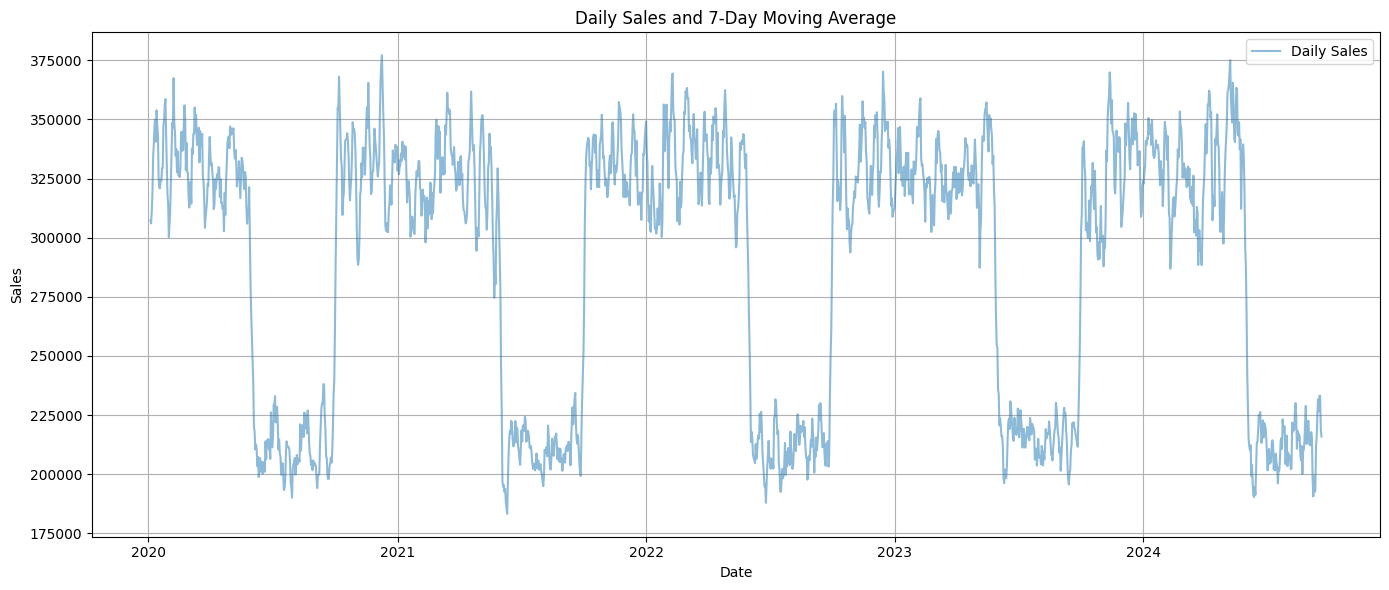

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_df['Date'], daily_df['Sales'], label='Daily Sales', alpha=0.5)
# plt.plot(daily_df['Date'], daily_df['smoothed_sales'], label='7-Day Moving Average', color='red', linewidth=2)

# Formatting
plt.title('Daily Sales and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
display(daily_df)

,Date,Sales,Quantity,Unique_Customers,Num_Transactions,Avg_Price
0,2020-01-04,307310.940069,104,45,45,2592.181227
1,2020-01-05,306039.842039,134,62,63,2606.865379
2,2020-01-06,311634.155294,112,55,55,2592.300754
3,2020-01-07,319652.842497,118,51,51,2575.296046
4,2020-01-08,334678.016347,134,63,63,2589.692111
...,...,...,...,...,...,...
1716,2024-09-15,226571.631795,89,64,64,2606.443359
1717,2024-09-16,233203.991646,89,62,63,2612.376134
1718,2024-09-17,233237.671774,84,60,60,2605.945047
1719,2024-09-18,219364.145541,76,54,54,2604.948073


In [53]:
daily_df['ASP'] = daily_df['Sales'] / daily_df['Quantity']
daily_df['AOV'] = daily_df['Sales'] / daily_df['Num_Transactions']

daily_df['Year'] = daily_df['Date'].dt.year
daily_df['Month'] = daily_df['Date'].dt.month
daily_df['Day'] = daily_df['Date'].dt.day
daily_df['DayOfWeek'] = daily_df['Date'].dt.day_name()
daily_df['Is_Weekend'] = daily_df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)

In [54]:
display(daily_df)

,Date,Sales,Quantity,Unique_Customers,Num_Transactions,Avg_Price,ASP,AOV,Year,Month,Day,DayOfWeek,Is_Weekend
0,2020-01-04,307310.940069,104,45,45,2592.181227,2954.912885,6829.132002,2020,1,4,Saturday,1
1,2020-01-05,306039.842039,134,62,63,2606.865379,2283.879418,4857.775270,2020,1,5,Sunday,1
2,2020-01-06,311634.155294,112,55,55,2592.300754,2782.447815,5666.075551,2020,1,6,Monday,0
3,2020-01-07,319652.842497,118,51,51,2575.296046,2708.922394,6267.702794,2020,1,7,Tuesday,0
4,2020-01-08,334678.016347,134,63,63,2589.692111,2497.597137,5312.349466,2020,1,8,Wednesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,2024-09-15,226571.631795,89,64,64,2606.443359,2545.748672,3540.181747,2024,9,15,Sunday,1
1717,2024-09-16,233203.991646,89,62,63,2612.376134,2620.269569,3701.650661,2024,9,16,Monday,0
1718,2024-09-17,233237.671774,84,60,60,2605.945047,2776.638950,3887.294530,2024,9,17,Tuesday,0
1719,2024-09-18,219364.145541,76,54,54,2604.948073,2886.370336,4062.298992,2024,9,18,Wednesday,0


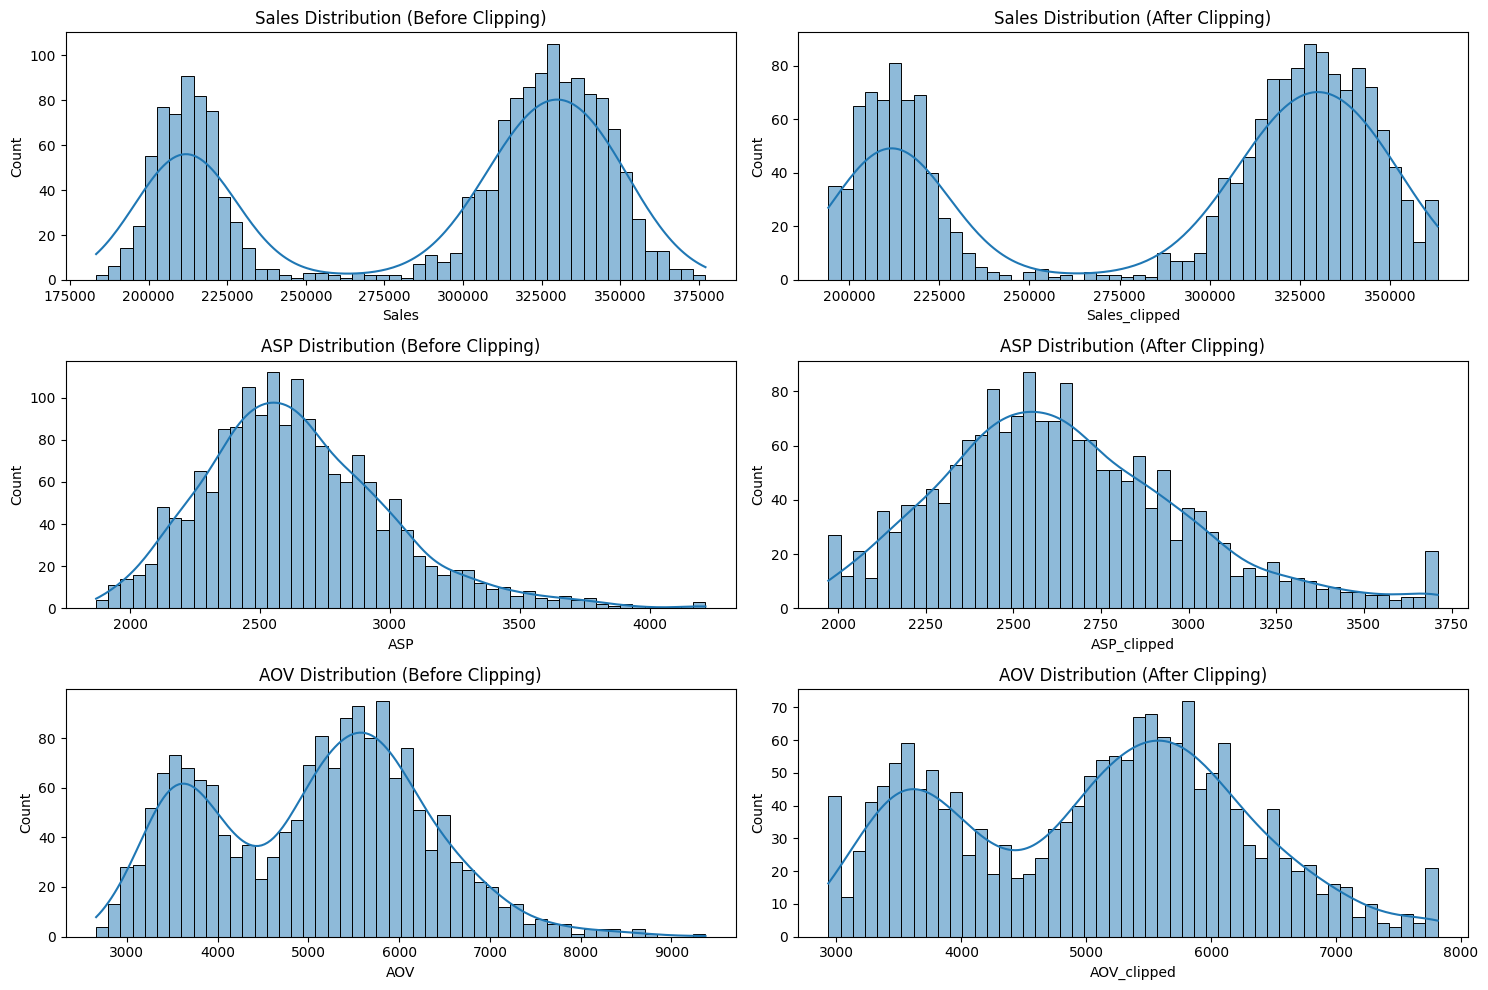

Skewness of Sales before clipping: -0.50
Skewness of Sales after clipping: -0.50
---
Skewness of ASP before clipping: 0.75
Skewness of ASP after clipping: 0.63
---
Skewness of AOV before clipping: 0.08
Skewness of AOV after clipping: 0.01
---


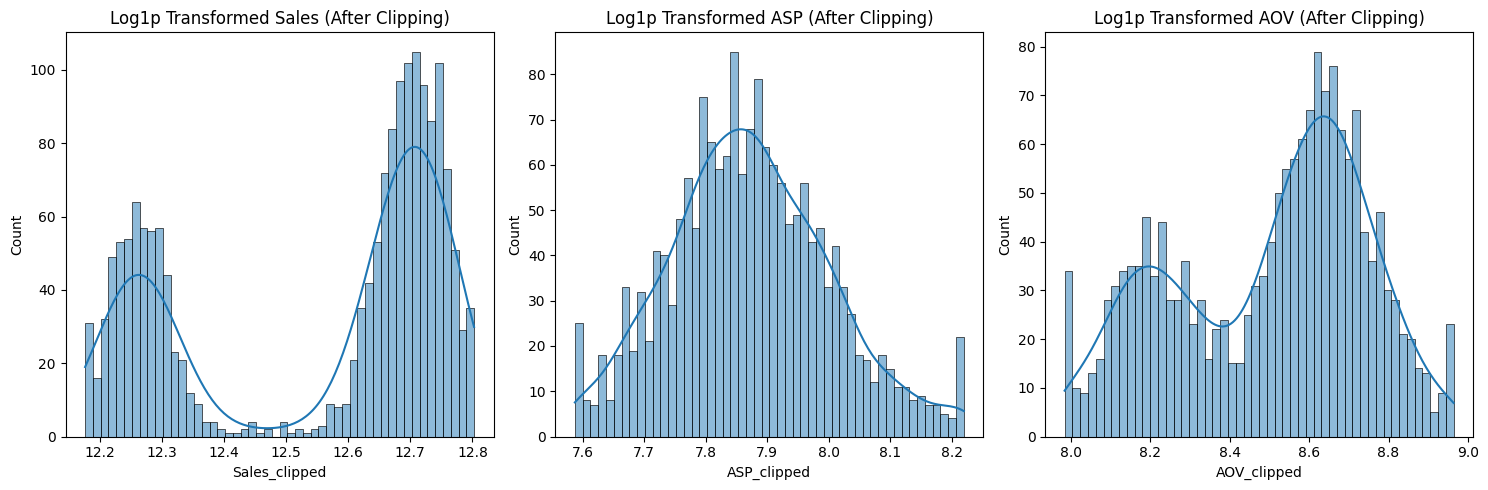

        Date          Sales  Quantity  Unique_Customers  Num_Transactions  \
0 2020-01-04  307310.940069       104                45                45   
1 2020-01-05  306039.842039       134                62                63   
2 2020-01-06  311634.155294       112                55                55   
3 2020-01-07  319652.842497       118                51                51   
4 2020-01-08  334678.016347       134                63                63   

     Avg_Price          ASP          AOV  Year  Month  Day  DayOfWeek  \
0  2592.181227  2954.912885  6829.132002  2020      1    4   Saturday   
1  2606.865379  2283.879418  4857.775270  2020      1    5     Sunday   
2  2592.300754  2782.447815  5666.075551  2020      1    6     Monday   
3  2575.296046  2708.922394  6267.702794  2020      1    7    Tuesday   
4  2589.692111  2497.597137  5312.349466  2020      1    8  Wednesday   

   Is_Weekend  Sales_clipped  ASP_clipped  AOV_clipped  log_Sales   log_ASP  \
0           1  3073

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols_to_check = ['Sales', 'ASP', 'AOV']

def clip_outliers(series, lower_quantile=0.01, upper_quantile=0.99):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

for col in cols_to_check:
    daily_df[f'{col}_clipped'] = clip_outliers(daily_df[col])

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 2, 2*i - 1)
    sns.histplot(daily_df[col], bins=50, kde=True)
    plt.title(f'{col} Distribution (Before Clipping)')

    plt.subplot(3, 2, 2*i)
    sns.histplot(daily_df[f'{col}_clipped'], bins=50, kde=True)
    plt.title(f'{col} Distribution (After Clipping)')

plt.tight_layout()
plt.show()

for col in cols_to_check:
    print(f'Skewness of {col} before clipping: {daily_df[col].skew():.2f}')
    print(f'Skewness of {col} after clipping: {daily_df[f"{col}_clipped"].skew():.2f}')
    print('---')

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1, 3, i)
    sns.histplot(np.log1p(daily_df[f'{col}_clipped']), bins=50, kde=True)
    plt.title(f'Log1p Transformed {col} (After Clipping)')

plt.tight_layout()
plt.show()

# Optional: Store log transformed versions for modeling
for col in cols_to_check:
    daily_df[f'log_{col}'] = np.log1p(daily_df[f'{col}_clipped'])

# Quick check of resulting dataframe columns
print(daily_df.head())

In [56]:
display(daily_df)

,Date,Sales,Quantity,Unique_Customers,Num_Transactions,Avg_Price,ASP,AOV,Year,Month,Day,DayOfWeek,Is_Weekend,Sales_clipped,ASP_clipped,AOV_clipped,log_Sales,log_ASP,log_AOV
0,2020-01-04,307310.940069,104,45,45,2592.181227,2954.912885,6829.132002,2020,1,4,Saturday,1,307310.940069,2954.912885,6829.132002,12.635619,7.991563,8.829099
1,2020-01-05,306039.842039,134,62,63,2606.865379,2283.879418,4857.775270,2020,1,5,Sunday,1,306039.842039,2283.879418,4857.775270,12.631474,7.734069,8.488542
2,2020-01-06,311634.155294,112,55,55,2592.300754,2782.447815,5666.075551,2020,1,6,Monday,0,311634.155294,2782.447815,5666.075551,12.649588,7.931446,8.642428
3,2020-01-07,319652.842497,118,51,51,2575.296046,2708.922394,6267.702794,2020,1,7,Tuesday,0,319652.842497,2708.922394,6267.702794,12.674994,7.904675,8.743325
4,2020-01-08,334678.016347,134,63,63,2589.692111,2497.597137,5312.349466,2020,1,8,Wednesday,0,334678.016347,2497.597137,5312.349466,12.720927,7.823485,8.577978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,2024-09-15,226571.631795,89,64,64,2606.443359,2545.748672,3540.181747,2024,9,15,Sunday,1,226571.631795,2545.748672,3540.181747,12.330821,7.842573,8.172216
1717,2024-09-16,233203.991646,89,62,63,2612.376134,2620.269569,3701.650661,2024,9,16,Monday,0,233203.991646,2620.269569,3701.650661,12.359673,7.871414,8.216804
1718,2024-09-17,233237.671774,84,60,60,2605.945047,2776.638950,3887.294530,2024,9,17,Tuesday,0,233237.671774,2776.638950,3887.294530,12.359818,7.929357,8.265726
1719,2024-09-18,219364.145541,76,54,54,2604.948073,2886.370336,4062.298992,2024,9,18,Wednesday,0,219364.145541,2886.370336,4062.298992,12.298493,7.968101,8.309750


In [57]:
cols_to_drop = ['Sales', 'ASP', 'AOV', 'Avg_Price', 'Day']

daily_df = daily_df.drop(columns=cols_to_drop)

print(daily_df.columns)

Index(['Date', 'Quantity', 'Unique_Customers', 'Num_Transactions', 'Year',
       'Month', 'DayOfWeek', 'Is_Weekend', 'Sales_clipped', 'ASP_clipped',
       'AOV_clipped', 'log_Sales', 'log_ASP', 'log_AOV'],
      dtype='object')


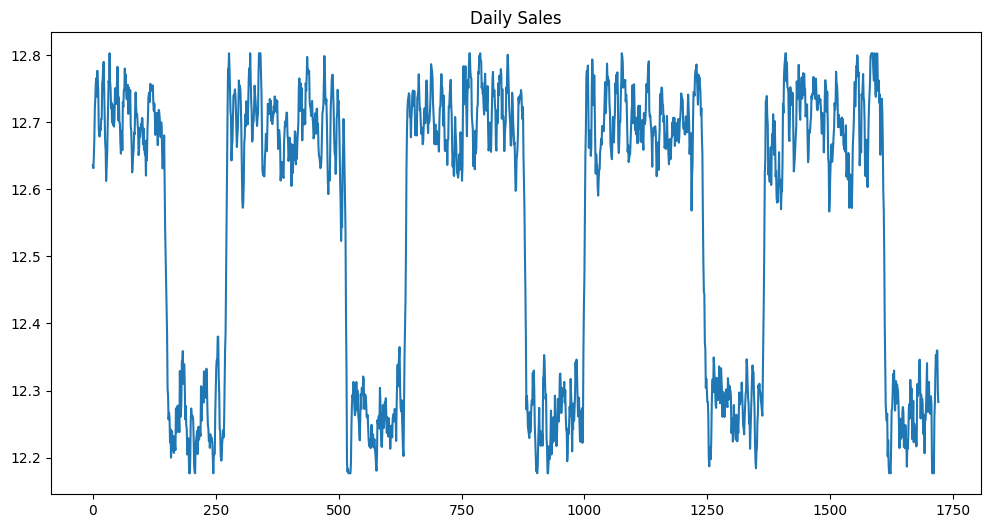

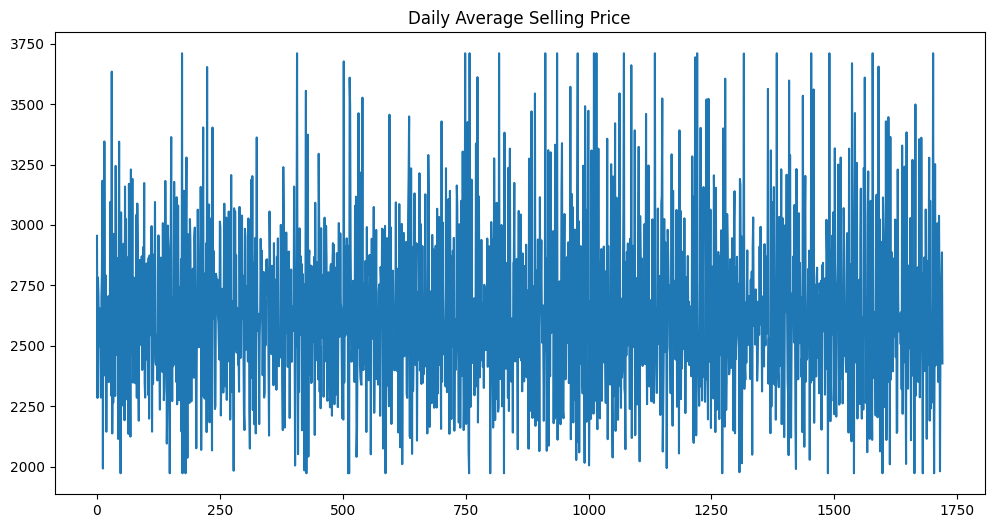

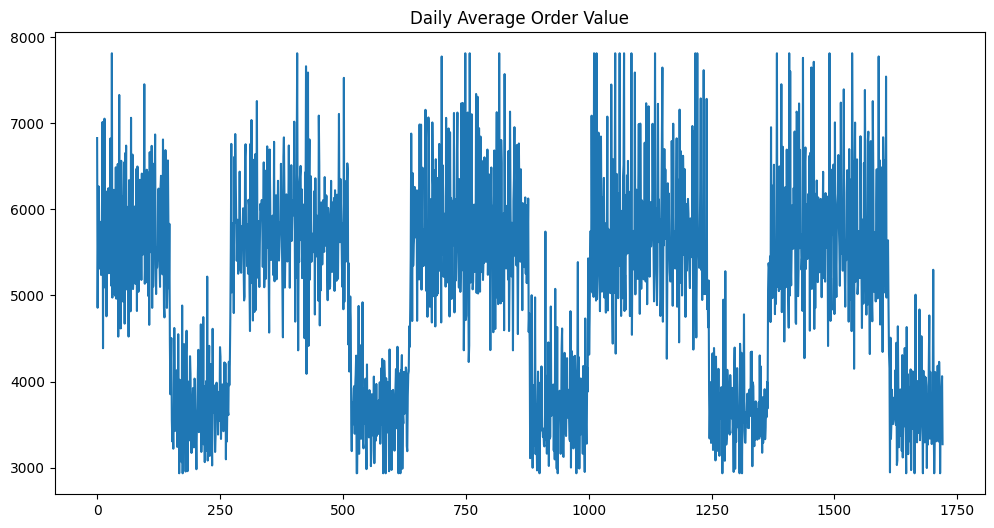

In [58]:
daily_df['log_Sales'].plot(figsize=(12,6), title='Daily Sales')
plt.show()

daily_df['ASP_clipped'].plot(figsize=(12,6), title='Daily Average Selling Price')
plt.show()

daily_df['AOV_clipped'].plot(figsize=(12,6), title='Daily Average Order Value')
plt.show()

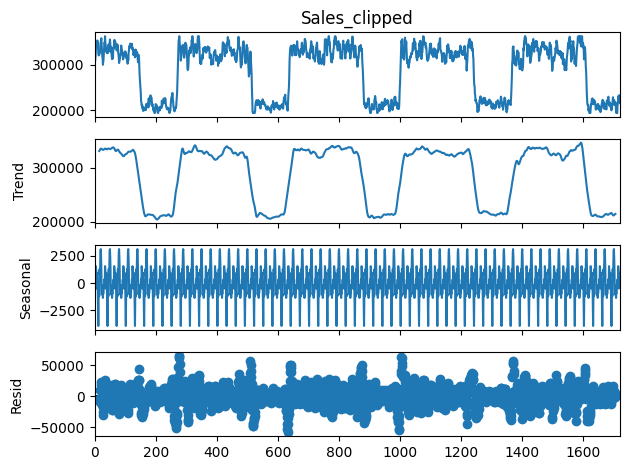

[-291.40667632808885, -221.946929497054, 337.69554564950204, -108.57142378566702, 1552.6119241305837, 1161.1307056299845, -508.21936343021775, 224.78869554983814, 943.4394308586809, -85.72700326156242, -75.77120134199252, -2211.011558084985, -3947.5283629001533, -1238.3989711118636, -951.626644603297, -1213.4815624756036, 1266.5706732565643, 726.2511316979748, 1402.4373019513673, 2865.3655096375305, 3118.6019307945107, 2384.380894597096, 1165.892048991568, -1044.8694966620649, -1027.9406046845663, -823.5988147462969, -199.8894308793378, -1367.0503359694173, -902.8564310964514, -929.2709818865817, -291.40667632808885, -221.946929497054, 337.69554564950204, -108.57142378566702, 1552.6119241305837, 1161.1307056299845, -508.21936343021775, 224.78869554983814, 943.4394308586809, -85.72700326156242, -75.77120134199252, -2211.011558084985, -3947.5283629001533, -1238.3989711118636, -951.626644603297, -1213.4815624756036, 1266.5706732565643, 726.2511316979748, 1402.4373019513673, 2865.365509637

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_df['Sales_clipped'], model='additive', period=30)
result.plot()
plt.show()

print(result.seasonal.values.tolist())
print(result.trend.values.tolist())


In [60]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(daily_df['log_Sales'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -3.281040352083061
p-value: 0.015747537201236544


In [61]:
daily_df['lag_1'] = daily_df['Sales_clipped'].shift(1)
daily_df['rolling_mean_7'] = daily_df['Sales_clipped'].rolling(window=7).mean()


In [62]:
daily_df.dropna(inplace=True)

In [63]:
display(daily_df)

,Date,Quantity,Unique_Customers,Num_Transactions,Year,Month,DayOfWeek,Is_Weekend,Sales_clipped,ASP_clipped,AOV_clipped,log_Sales,log_ASP,log_AOV,lag_1,rolling_mean_7
6,2020-01-10,133,63,63,2020,1,Friday,0,347452.480887,2612.424668,5515.118744,12.758386,7.868417,8.615430,339864.835169,323804.730329
7,2020-01-11,144,60,61,2020,1,Saturday,1,349979.819655,2430.415414,5737.374093,12.765634,7.796229,8.654931,347452.480887,329900.284555
8,2020-01-12,149,64,65,2020,1,Sunday,1,340531.979804,2285.449529,5238.953535,12.738267,7.734755,8.564068,349979.819655,334827.732807
9,2020-01-13,131,64,64,2020,1,Monday,0,353841.431301,2701.079628,5528.772364,12.776607,7.901777,8.617902,340531.979804,340857.343666
10,2020-01-14,124,57,57,2020,1,Tuesday,0,347238.141032,2800.307589,6091.897211,12.757769,7.937842,8.714879,353841.431301,344798.100599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,2024-09-15,89,64,64,2024,9,Sunday,1,226571.631795,2545.748672,3540.181747,12.330821,7.842573,8.172216,231707.040855,214122.942055
1717,2024-09-16,89,62,63,2024,9,Monday,0,233203.991646,2620.269569,3701.650661,12.359673,7.871414,8.216804,226571.631795,219691.262536
1718,2024-09-17,84,60,60,2024,9,Tuesday,0,233237.671774,2776.638950,3887.294530,12.359818,7.929357,8.265726,233203.991646,225264.394464
1719,2024-09-18,76,54,54,2024,9,Wednesday,0,219364.145541,2886.370336,4062.298992,12.298493,7.968101,8.309750,233237.671774,226394.955250


In [64]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prophet without regressors

In [65]:
# df = df.sort_values('Date').reset_index(drop=True)

split_index = int(len(daily_df) * 0.90)

train_df = daily_df.iloc[:split_index].copy()
test_df = daily_df.iloc[split_index:].copy()

train_prophet = train_df[['Date', 'log_Sales']].rename(columns={'Date': 'ds', 'log_Sales': 'y'})

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train_prophet)

future = daily_df[['Date']].rename(columns={'Date': 'ds'}).iloc[:len(train_df)+len(test_df)]

forecast = model.predict(future)

forecast_test = forecast[['ds', 'yhat']].iloc[len(train_df):].set_index('ds')
actual_test = test_df.set_index('Date')[['log_Sales']]

comparison_df = actual_test.join(forecast_test)

rmse = np.sqrt(mean_squared_error(comparison_df['log_Sales'], comparison_df['yhat']))
mae = mean_absolute_error(comparison_df['log_Sales'], comparison_df['yhat'])
mape = np.mean(np.abs((comparison_df['log_Sales'] - comparison_df['yhat']) / comparison_df['log_Sales'])) * 100

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%')



DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/29w_bwnh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/zs9yi6ib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44905', 'data', 'file=/tmp/tmpx9p4x1kk/29w_bwnh.json', 'init=/tmp/tmpx9p4x1kk/zs9yi6ib.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelosp1tq5s/prophet_model-20250922095715.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.09
MAE: 0.08
MAPE: 0.63%


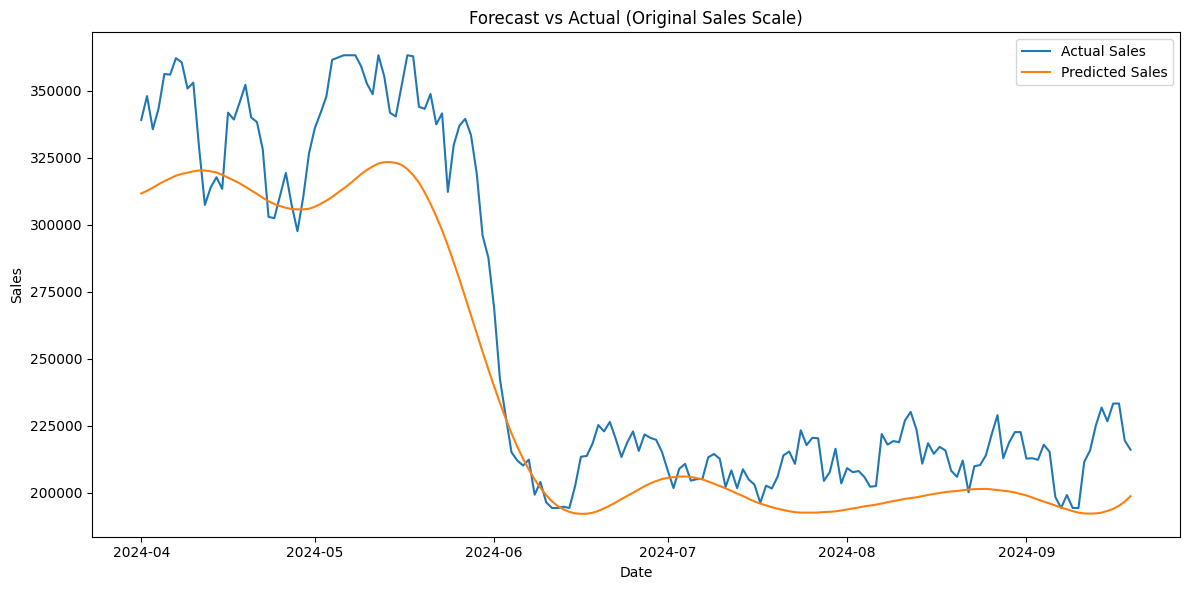

RMSE: 25,101.61
MAE: 20,256.71
MAPE: 7.46%


In [66]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

comparison_df['Actual_Sales'] = np.exp(comparison_df['log_Sales'])
comparison_df['Predicted_Sales'] = np.exp(comparison_df['yhat'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Actual_Sales'], label='Actual Sales')
plt.plot(comparison_df.index, comparison_df['Predicted_Sales'], label='Predicted Sales')
plt.title('Forecast vs Actual (Original Sales Scale)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

rmse = np.sqrt(mean_squared_error(comparison_df['Actual_Sales'], comparison_df['Predicted_Sales']))
mae = mean_absolute_error(comparison_df['Actual_Sales'], comparison_df['Predicted_Sales'])
mape = np.mean(np.abs((comparison_df['Actual_Sales'] - comparison_df['Predicted_Sales']) / comparison_df['Actual_Sales'])) * 100

print(f'RMSE: {rmse:,.2f}')
print(f'MAE: {mae:,.2f}')
print(f'MAPE: {mape:.2f}%')


In [67]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_prophet = daily_df[['Date', 'log_Sales']].rename(columns={'Date':'ds', 'log_Sales':'y'})

# param_grid = {
#     'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
#     'seasonality_prior_scale': [1.0, 5.0, 10.0],
#     'holidays_prior_scale': [0.1, 1.0, 5.0],
#     'seasonality_mode': ['additive', 'multiplicative'],
#     'changepoint_range': [0.7, 0.8, 0.9]
# }

param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 0.5, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

results = []

for i,params in enumerate(all_params):
    print(f"Running {i+1}/{len(all_params)}: {params}")
    m = Prophet(
        growth='linear',
        **params,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False,
    )
    m.fit(df_prophet)

    df_cv = cross_validation(m, horizon='365 days', period='60 days', initial='1095 days')
    df_p = performance_metrics(df_cv, rolling_window=1)

    mapes = df_p['mape'].values
    avg_mape = np.mean(mapes)

    res = params.copy()
    res['avg_mape'] = avg_mape
    res['rmse'] = df_p['rmse'].mean()
    res['mae'] = df_p['mae'].mean()
    results.append(res)

results_df = pd.DataFrame(results)
best = results_df.sort_values('avg_mape').iloc[0]
print("Best parameters:", best)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gza6k79n.json


Running 1/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gcgyhyoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93121', 'data', 'file=/tmp/tmpx9p4x1kk/gza6k79n.json', 'init=/tmp/tmpx9p4x1kk/gcgyhyoo.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelfhinpy_q/prophet_model-20250922095718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/0xypce8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4zpq8onx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25765', 'data', 'file=/tmp/tmpx9p4x1kk/0xypce8p.json', 'init=/tmp/tmpx9p4x1kk/4zpq8onx.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelzcmskar9/prophet_model-20250922095719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/jnf1he17.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/l1gc3vd0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 2/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/9bpqt6bv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16337', 'data', 'file=/tmp/tmpx9p4x1kk/sizx5zuf.json', 'init=/tmp/tmpx9p4x1kk/9bpqt6bv.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelmw1965qw/prophet_model-20250922095723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/65ihyq47.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/9lu7w3jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22533', 'data', 'file=/tmp/tmpx9p4x1kk/65ihyq47.json', 'init=/tmp/tmpx9p4x1kk/9lu7w3jv.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model95_9c7h0/prophet_model-20250922095724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/zg190j4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/75ft9q0p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 3/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/lku54_pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1663', 'data', 'file=/tmp/tmpx9p4x1kk/fb6re2fz.json', 'init=/tmp/tmpx9p4x1kk/lku54_pw.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelz1umk3j6/prophet_model-20250922095728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/s4jm99ca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/5hhq4_as.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50171', 'data', 'file=/tmp/tmpx9p4x1kk/s4jm99ca.json', 'init=/tmp/tmpx9p4x1kk/5hhq4_as.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modeljwabovil/prophet_model-20250922095729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/mt87c8z1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/c_otwbw4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 4/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:57:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4lq9s2ud.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/flqgcl2s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30239', 'data', 'file=/tmp/tmpx9p4x1kk/4lq9s2ud.json', 'init=/tmp/tmpx9p4x1kk/flqgcl2s.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modellbvqpuha/prophet_model-20250922095734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/t_kqvd7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/mzg5v58k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 5/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/mpu_e7x5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/3v9dhgrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16141', 'data', 'file=/tmp/tmpx9p4x1kk/mpu_e7x5.json', 'init=/tmp/tmpx9p4x1kk/3v9dhgrg.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model1pnq66va/prophet_model-20250922095736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/2w3lx58p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/o7mv216u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 6/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:57:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/bge0264i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/yv8u3i8q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13556', 'data', 'file=/tmp/tmpx9p4x1kk/bge0264i.json', 'init=/tmp/tmpx9p4x1kk/yv8u3i8q.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model18con9w7/prophet_model-20250922095739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/u4r66uly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/kyrofd1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 7/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/y52cwwk7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/5i7ntbme.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55869', 'data', 'file=/tmp/tmpx9p4x1kk/y52cwwk7.json', 'init=/tmp/tmpx9p4x1kk/5i7ntbme.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelwstj479x/prophet_model-20250922095741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4sp1g80r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/t29ym5ek.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44779', 'data', 'file=/tmp/tmpx9p4x1kk/4sp1g80r.json', 'init=/tmp/tmpx9p4x1kk/t29ym5ek.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model8g9yf4ym/prophet_model-20250922095741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/c4k02dwh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/2fngxojd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 8/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ekpdcz0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58364', 'data', 'file=/tmp/tmpx9p4x1kk/0vz_e_lw.json', 'init=/tmp/tmpx9p4x1kk/ekpdcz0c.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model9rpkg04k/prophet_model-20250922095743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/zi1h1p8t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ddecjq5i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84296', 'data', 'file=/tmp/tmpx9p4x1kk/zi1h1p8t.json', 'init=/tmp/tmpx9p4x1kk/ddecjq5i.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model138nh908/prophet_model-20250922095744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/igr3_veq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/2ffs_0kz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 9/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:57:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/a427twnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/vs218gfh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67464', 'data', 'file=/tmp/tmpx9p4x1kk/a427twnq.json', 'init=/tmp/tmpx9p4x1kk/vs218gfh.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_models_4g52n3/prophet_model-20250922095747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4j6v0pjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/q7sgopnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 10/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:57:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/rb5unkil.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/g_08qi2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78297', 'data', 'file=/tmp/tmpx9p4x1kk/rb5unkil.json', 'init=/tmp/tmpx9p4x1kk/g_08qi2r.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modellvr2n4xi/prophet_model-20250922095749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/d51lqmwu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/8z0jrw_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 11/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:57:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/9_icr8ih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gh4ajltw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83626', 'data', 'file=/tmp/tmpx9p4x1kk/9_icr8ih.json', 'init=/tmp/tmpx9p4x1kk/gh4ajltw.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelidi4rx0m/prophet_model-20250922095752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/9p1mu73j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ab0likkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 12/36: {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:57:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/2uorzoxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/guy45v8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26885', 'data', 'file=/tmp/tmpx9p4x1kk/2uorzoxu.json', 'init=/tmp/tmpx9p4x1kk/guy45v8m.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelhsq4l5dh/prophet_model-20250922095754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1_j048zd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/wc1lgklj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 13/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4d1wrbm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40841', 'data', 'file=/tmp/tmpx9p4x1kk/oyrolpyp.json', 'init=/tmp/tmpx9p4x1kk/4d1wrbm0.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modeleslc7g01/prophet_model-20250922095756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/f7v6oueh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/zssyy_l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12791', 'data', 'file=/tmp/tmpx9p4x1kk/f7v6oueh.json', 'init=/tmp/tmpx9p4x1kk/zssyy_l8.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model77ksubmw/prophet_model-20250922095757.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:57:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:57:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/yxoy0fec.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/szdduy54.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 14/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:58:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/iy8qefqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/fgfl2osh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94305', 'data', 'file=/tmp/tmpx9p4x1kk/iy8qefqj.json', 'init=/tmp/tmpx9p4x1kk/fgfl2osh.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelriec5v0i/prophet_model-20250922095801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/qaftwzfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/lqx9a0fu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 15/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:58:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/47_x0kuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/_yjrr1jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17996', 'data', 'file=/tmp/tmpx9p4x1kk/47_x0kuq.json', 'init=/tmp/tmpx9p4x1kk/_yjrr1jv.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model6h764vvl/prophet_model-20250922095805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/m_vei5g9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/7iq632k4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 16/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/dk2nusri.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/rqhludyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47726', 'data', 'file=/tmp/tmpx9p4x1kk/dk2nusri.json', 'init=/tmp/tmpx9p4x1kk/rqhludyg.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelsbmd1g47/prophet_model-20250922095809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/849iief5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/j1qxxrlf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 17/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:58:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/t467jxx8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/6ccxolne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62244', 'data', 'file=/tmp/tmpx9p4x1kk/t467jxx8.json', 'init=/tmp/tmpx9p4x1kk/6ccxolne.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelfebkz8w0/prophet_model-20250922095814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/s8eks07c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/0fy21ocz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 18/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:58:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/hz6p3mfv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/aqlckiot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59909', 'data', 'file=/tmp/tmpx9p4x1kk/hz6p3mfv.json', 'init=/tmp/tmpx9p4x1kk/aqlckiot.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelelvrm3yf/prophet_model-20250922095818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/p8svat2n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/rowlaaf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 19/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/r_z9whxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gnd1gx49.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16207', 'data', 'file=/tmp/tmpx9p4x1kk/r_z9whxw.json', 'init=/tmp/tmpx9p4x1kk/gnd1gx49.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelpx1y2q6p/prophet_model-20250922095822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/uzewb8zk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/iz71h_hu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 20/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:58:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/iiu5zj34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/z1x7gyfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3123', 'data', 'file=/tmp/tmpx9p4x1kk/iiu5zj34.json', 'init=/tmp/tmpx9p4x1kk/z1x7gyfe.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelhmocany5/prophet_model-20250922095826.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/taxyd8cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/r79xnplp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Running 21/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:58:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/vqn5q49p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/yc6x7rm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4758', 'data', 'file=/tmp/tmpx9p4x1kk/vqn5q49p.json', 'init=/tmp/tmpx9p4x1kk/yc6x7rm1.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modeldf0gk5bn/prophet_model-20250922095831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/sgrvlmhy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/05be7efw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Running 22/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:58:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/xipjsphe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gy4odurd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78378', 'data', 'file=/tmp/tmpx9p4x1kk/xipjsphe.json', 'init=/tmp/tmpx9p4x1kk/gy4odurd.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelnlaqhnmx/prophet_model-20250922095835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/c23m5jp8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/dwpm3cs_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 23/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:58:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/u1gyk23s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/3u5ebqfo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93857', 'data', 'file=/tmp/tmpx9p4x1kk/u1gyk23s.json', 'init=/tmp/tmpx9p4x1kk/3u5ebqfo.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modeltsgdwv_9/prophet_model-20250922095840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/r7_y9fgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/sw783xx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 24/36: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/cg7ya3g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17961', 'data', 'file=/tmp/tmpx9p4x1kk/mt0cf2me.json', 'init=/tmp/tmpx9p4x1kk/cg7ya3g6.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model9d1rexhi/prophet_model-20250922095844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/m8261mpp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1hzbxtwq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41814', 'data', 'file=/tmp/tmpx9p4x1kk/m8261mpp.json', 'init=/tmp/tmpx9p4x1kk/1hzbxtwq.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model82dvu_aq/prophet_model-20250922095846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/166b8owa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/7_379vj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 25/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:58:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/a_4rhjry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/cyy9x3ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95636', 'data', 'file=/tmp/tmpx9p4x1kk/a_4rhjry.json', 'init=/tmp/tmpx9p4x1kk/cyy9x3ch.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modellnfgfve3/prophet_model-20250922095852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/812mc4nr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/wopewvrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 26/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:58:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/e804s4u5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/4q5i3eta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54105', 'data', 'file=/tmp/tmpx9p4x1kk/e804s4u5.json', 'init=/tmp/tmpx9p4x1kk/4q5i3eta.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelziarfowa/prophet_model-20250922095856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:58:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/3c5sbw_v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/gfaij580.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 27/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:59:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/a4wag_99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1au_4pvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45335', 'data', 'file=/tmp/tmpx9p4x1kk/a4wag_99.json', 'init=/tmp/tmpx9p4x1kk/1au_4pvl.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelwu30vzzt/prophet_model-20250922095900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/305s5sdu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ls98l2vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 28/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:59:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/9gflh8uy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/rvhykpiv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16793', 'data', 'file=/tmp/tmpx9p4x1kk/9gflh8uy.json', 'init=/tmp/tmpx9p4x1kk/rvhykpiv.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model0hggbyb1/prophet_model-20250922095906.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/wh5ej32e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/_jnbh1s5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 29/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


09:59:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/cbe50jw4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/5_0pl0v0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53305', 'data', 'file=/tmp/tmpx9p4x1kk/cbe50jw4.json', 'init=/tmp/tmpx9p4x1kk/5_0pl0v0.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelfb31rh59/prophet_model-20250922095910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1fu77epc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/uxip_6ky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 30/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:59:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/g3aeook7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ydu2wbrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2658', 'data', 'file=/tmp/tmpx9p4x1kk/g3aeook7.json', 'init=/tmp/tmpx9p4x1kk/ydu2wbrp.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model5beey8bx/prophet_model-20250922095915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/sayt4pji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/0qwgd97q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Running 31/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/vjcn3r8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ktz64gqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44168', 'data', 'file=/tmp/tmpx9p4x1kk/vjcn3r8g.json', 'init=/tmp/tmpx9p4x1kk/ktz64gqh.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelrbfl3vm3/prophet_model-20250922095920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1tnt8ezp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/kc6y5ahj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 32/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


09:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/r_a5e_72.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/jp0u1le3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4365', 'data', 'file=/tmp/tmpx9p4x1kk/r_a5e_72.json', 'init=/tmp/tmpx9p4x1kk/jp0u1le3.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model2grzf0if/prophet_model-20250922095924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/u5t7pkhl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ad3k20mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

Running 33/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.8}


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77508', 'data', 'file=/tmp/tmpx9p4x1kk/p6qs1i6b.json', 'init=/tmp/tmpx9p4x1kk/uwtk3y9z.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model9nlhvwnc/prophet_model-20250922095928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/k5mask2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/opx4id2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63158', 'data', 'file=/tmp/tmpx9p4x1kk/k5mask2k.json', 'init=/tmp/tmpx9p4x1kk/opx4id2r.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model3zn46s9k/prophet_model-20250922095929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/56xub7eo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/3pf6o9rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 34/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'additive', 'changepoint_range': 0.9}


09:59:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/rm56j2dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/2e73qdsi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20572', 'data', 'file=/tmp/tmpx9p4x1kk/rm56j2dr.json', 'init=/tmp/tmpx9p4x1kk/2e73qdsi.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model9umz_3np/prophet_model-20250922095934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/6vx0wxrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/nu2dyo8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 35/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.8}


09:59:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/v9_8cadr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/f4cat2is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83114', 'data', 'file=/tmp/tmpx9p4x1kk/v9_8cadr.json', 'init=/tmp/tmpx9p4x1kk/f4cat2is.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelyulbi7py/prophet_model-20250922095939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/hl9ubfgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/nngf31g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Running 36/36: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.9}


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42719', 'data', 'file=/tmp/tmpx9p4x1kk/ol43dqmw.json', 'init=/tmp/tmpx9p4x1kk/_9m1xb_v.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modeljg_a2mqz/prophet_model-20250922095943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 5 forecasts with cutoffs between 2023-01-23 00:00:00 and 2023-09-20 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/zri6bl_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/ami2jzkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87527', 'data', 'file=/tmp/tmpx9p4x1kk/zri6bl_f.json', 'init=/tmp/tmpx9p4x1kk/ami2jzkd.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelsdaqje8t/prophet_model-20250922095944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:59:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:59:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/du3aq59n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/xehi2me_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Best parameters: changepoint_prior_scale              0.01
seasonality_prior_scale               0.5
seasonality_mode           multiplicative
changepoint_range                     0.8
avg_mape                         0.004009
rmse                             0.061327
mae                              0.050389
Name: 6, dtype: object


In [68]:
results_df.sort_values('avg_mape').iloc[0]

,6
changepoint_prior_scale,0.01
seasonality_prior_scale,0.5
seasonality_mode,multiplicative
changepoint_range,0.8
avg_mape,0.004009
rmse,0.061327
mae,0.050389


Forecast Accuracy Metrics

avg_mape	0.004009 (≈ 0.4%)	- Mean Absolute Percentage Error. Very low = excellent accuracy. Anything < 5% is generally great.

rmse	0.061327 - Root Mean Squared Error. Measures average magnitude of forecast errors. Sensitive to large errors. Lower is better. Context depends on scale of your Sales.

mae	0.050389 - Mean Absolute Error. Average absolute forecast error. Again, this is very low, but interpretation depends on the scale of your Sales.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/mkv_gdha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/1fnqynqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24640', 'data', 'file=/tmp/tmpx9p4x1kk/mkv_gdha.json', 'init=/tmp/tmpx9p4x1kk/1fnqynqz.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_modelhbr_i070/prophet_model-20250922103239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


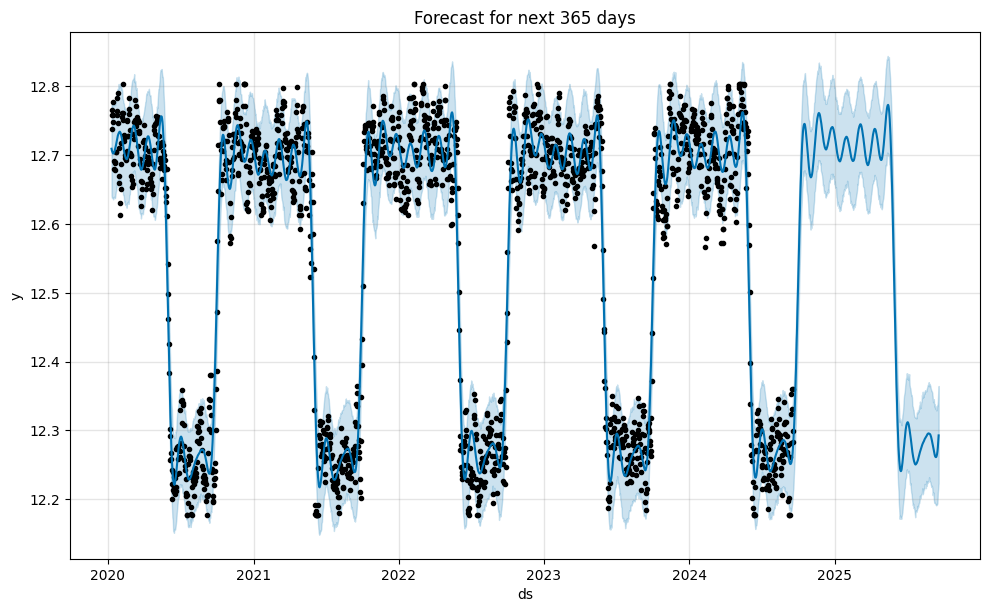

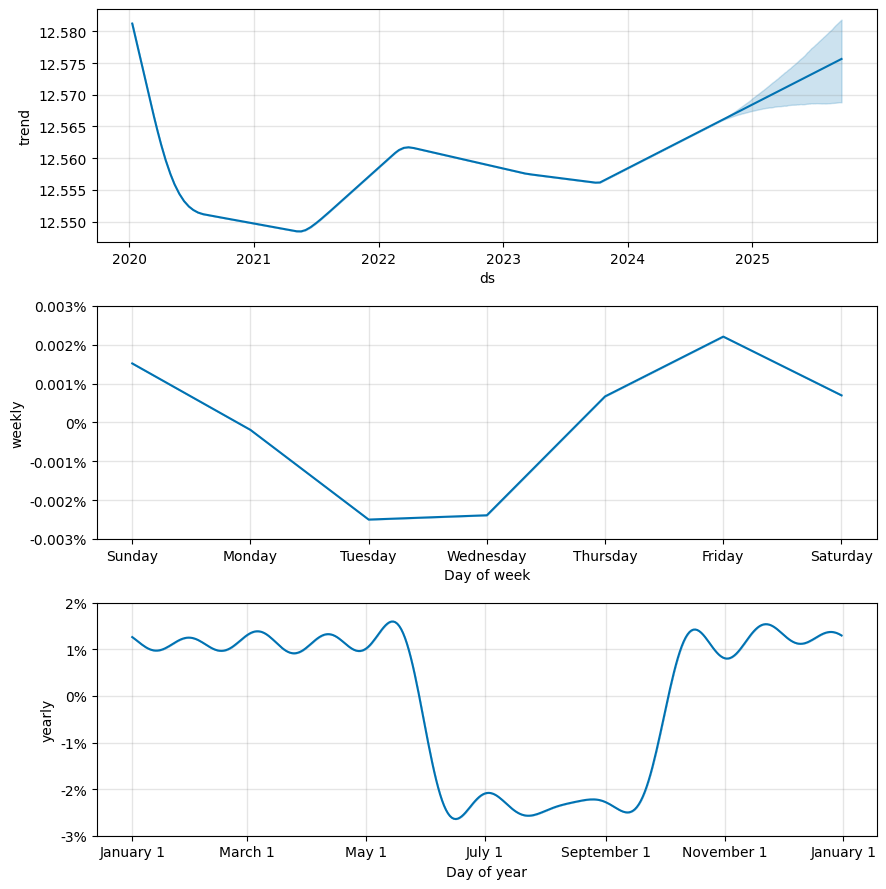

In [82]:
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

best_params = {
    'changepoint_prior_scale': 0.01,
    'seasonality_prior_scale': 0.5,
    'seasonality_mode': 'multiplicative',
    'changepoint_range': 0.8,
    'n_changepoints':100,
}

final_model = Prophet(
    growth='linear',
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False,
    **best_params
)

final_model.fit(df_prophet)

future = final_model.make_future_dataframe(periods=365)
forecast = final_model.predict(future)

final_model.plot(forecast)
plt.title('Forecast for next 365 days')
plt.show()

final_model.plot_components(forecast)
plt.show()

plot_plotly(final_model, forecast)
plot_components_plotly(final_model, forecast)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/pshh_qu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9p4x1kk/d_haxvbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85120', 'data', 'file=/tmp/tmpx9p4x1kk/pshh_qu0.json', 'init=/tmp/tmpx9p4x1kk/d_haxvbw.json', 'output', 'file=/tmp/tmpx9p4x1kk/prophet_model1s7t8r72/prophet_model-20250922103244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:32:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


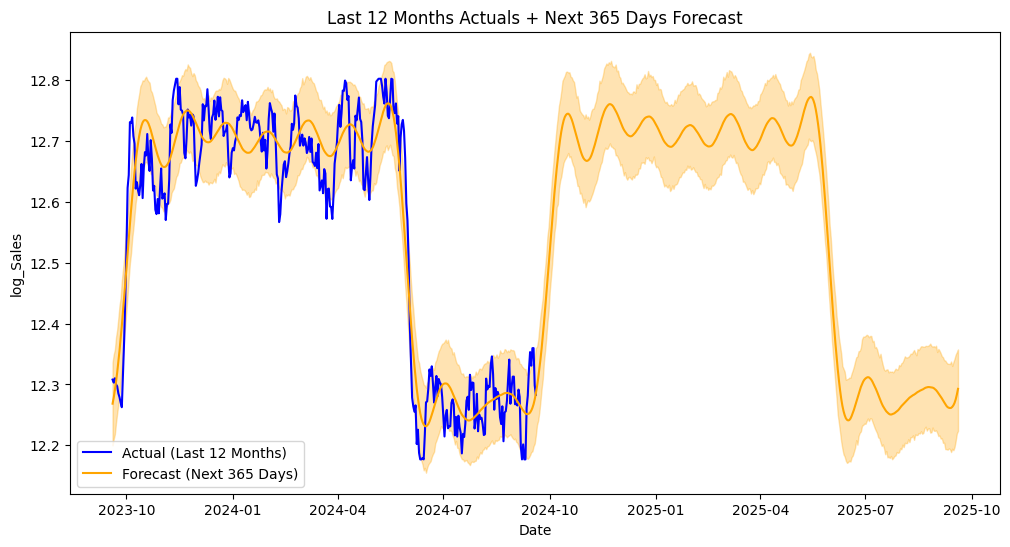

In [83]:
import matplotlib.pyplot as plt

final_model = Prophet(
    growth='linear',
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False,
    **best_params
)
final_model.fit(df_prophet)

future = final_model.make_future_dataframe(periods=365)
forecast = final_model.predict(future)

last_date = df_prophet['ds'].max()
six_months_ago = last_date - pd.DateOffset(months=12)
actual_last_6m = df_prophet[df_prophet['ds'] >= six_months_ago]

forecast_filtered = forecast[(forecast['ds'] >= six_months_ago) & (forecast['ds'] <= last_date + pd.DateOffset(days=365))]

plt.figure(figsize=(12,6))
plt.plot(actual_last_6m['ds'], actual_last_6m['y'], label='Actual (Last 12 Months)', color='blue')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecast (Next 365 Days)', color='orange')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], color='orange', alpha=0.3)

plt.title('Last 12 Months Actuals + Next 365 Days Forecast')
plt.xlabel('Date')
plt.ylabel('log_Sales')
plt.legend()
plt.show()


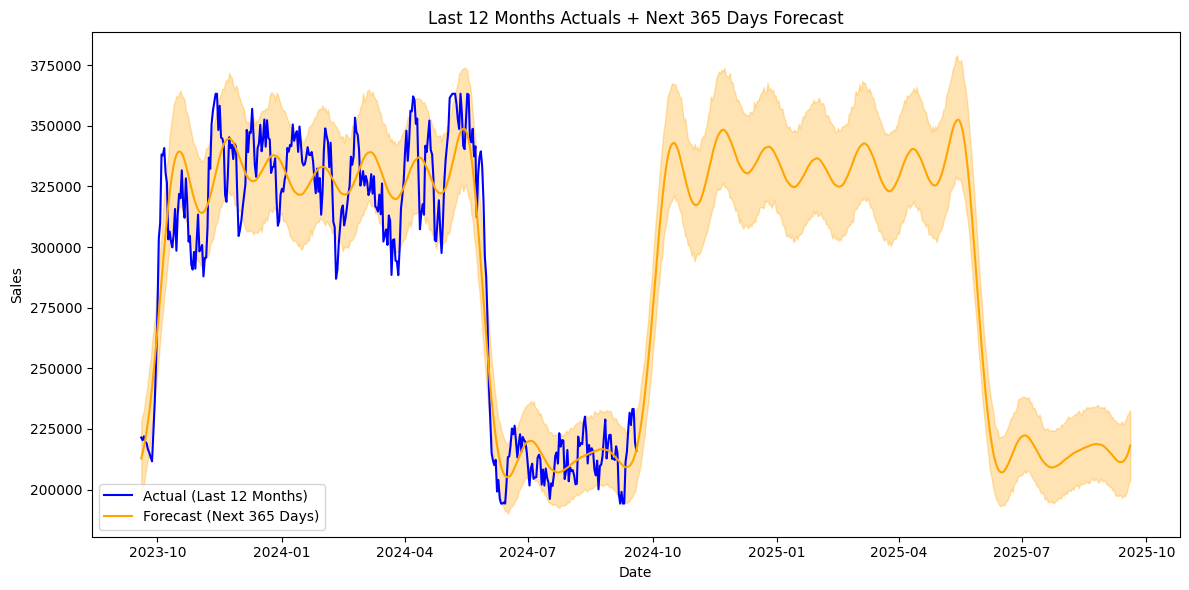

In [84]:
import numpy as np
import matplotlib.pyplot as plt

forecast_filtered['yhat'] = np.expm1(forecast_filtered['yhat']).astype(int)
forecast_filtered['yhat_lower'] = np.expm1(forecast_filtered['yhat_lower']).astype(int)
forecast_filtered['yhat_upper'] = np.expm1(forecast_filtered['yhat_upper']).astype(int)

actual_last_6m['y'] = np.expm1(actual_last_6m['y']).astype(int)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actual_last_6m['ds'], actual_last_6m['y'], label='Actual (Last 12 Months)', color='blue')
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Forecast (Next 365 Days)', color='orange')
plt.fill_between(
    forecast_filtered['ds'],
    forecast_filtered['yhat_lower'],
    forecast_filtered['yhat_upper'],
    color='orange', alpha=0.3
)

plt.title('Last 12 Months Actuals + Next 365 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


In [85]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

merged = actual_last_6m.merge(forecast_filtered[['ds', 'yhat']], on='ds', how='inner')

y_true = merged['y']
y_pred = merged['yhat']

mape = mean_absolute_percentage_error(y_true, y_pred) * 100
smape = 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


MAPE: 4.78%
SMAPE: 4.76%


Excellent: < 5%

Good: 5–10%

Acceptable: 10–20%

Poor: > 20%